## Dog or Not Dog [shiv]

In [1]:
from imgdata import ImgData
import numpy as np

In [2]:
idata= ImgData("data/dog/")
idata.get_all_files()

Total 1001 image files found


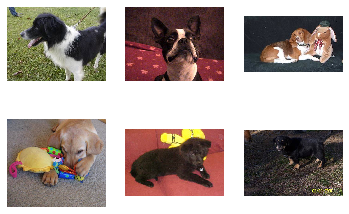

In [3]:
idata.plot_raw_sample(rows= 2, cols= 3)

In [ ]:
imgs= idata.process(size=(150,150), count= 100, silent= True)

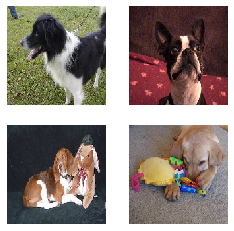

In [5]:
idata.plot_np_imgs(imgs)

## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input= layers.Input()